In [1]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
train_dir = "C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/program_dataset/training/training/"
validation_dir = "C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/program_dataset/validation/validation/"
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 1098 images belonging to 10 classes.
Found 264 images belonging to 10 classes.


In [3]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Organic') 
    # and 1 for the other ('Recycled')
    tf.keras.layers.Dense(10, activation='sigmoid')  
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

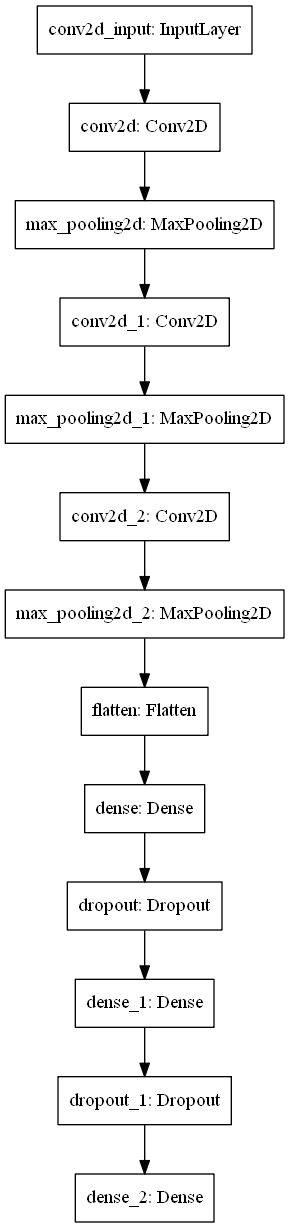

In [5]:
from tensorflow import keras
keras.utils.plot_model(model, "my_cnn_model.png")

In [6]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics = ['acc'])

C:\Users\User\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [9]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=20,
                              epochs=10,
                              validation_steps=10,
                              verbose=2)

Epoch 1/10
20/20 - 31s - loss: 0.0651 - acc: 0.9750 - val_loss: 3.1321 - val_acc: 0.5150
Epoch 2/10
20/20 - 25s - loss: 0.1411 - acc: 0.9625 - val_loss: 2.1562 - val_acc: 0.5800
Epoch 3/10
20/20 - 24s - loss: 0.1055 - acc: 0.9724 - val_loss: 2.4561 - val_acc: 0.5450
Epoch 4/10
20/20 - 22s - loss: 0.1524 - acc: 0.9523 - val_loss: 2.5778 - val_acc: 0.5500
Epoch 5/10
20/20 - 26s - loss: 0.0364 - acc: 0.9925 - val_loss: 2.6882 - val_acc: 0.5550
Epoch 6/10
20/20 - 26s - loss: 0.0967 - acc: 0.9825 - val_loss: 2.6977 - val_acc: 0.5600
Epoch 7/10
20/20 - 23s - loss: 0.1634 - acc: 0.9550 - val_loss: 2.7595 - val_acc: 0.5300
Epoch 8/10
20/20 - 24s - loss: 0.0640 - acc: 0.9899 - val_loss: 3.6977 - val_acc: 0.4900
Epoch 9/10
20/20 - 23s - loss: 0.1736 - acc: 0.9550 - val_loss: 3.1547 - val_acc: 0.5150
Epoch 10/10
20/20 - 22s - loss: 0.0435 - acc: 0.9899 - val_loss: 2.6139 - val_acc: 0.5700


In [3]:
test2_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_dir = "C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/program_dataset/test/"
test_generator =  test2_datagen.flow_from_directory(test_dir,
                                                    batch_size=6,
                                                    class_mode  = None,
                                                    target_size = (150, 150),
                                                    shuffle=False)

Found 9 images belonging to 1 classes.


In [11]:
y_prob = model.predict_generator(test_generator)

C:\Users\User\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [12]:
cls = []
classes = list(train_generator.class_indices.keys())

In [13]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])

In [14]:
cls

['n9', 'n2', 'n1', 'n3', 'n3', 'n7', 'n3', 'n7', 'n5']

In [15]:

def plot_learning_curve(history,epochs):
    epochs = np.arange(1,epochs+1)
    plt.figure(figsize=(10,6))
    plt.plot(epochs,history.history['acc'])
    plt.plot(epochs,history.history['val_acc'])
    plt.title("Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel("Accuracy")
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()
    
    plt.figure(figsize=(10,6)) 
    plt.plot(epochs,history.history['loss'])
    plt.plot(epochs,history.history['val_loss'])
    plt.title("Loss")
    plt.xlabel('Epochs')
    plt.ylabel("Loss")
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()
    

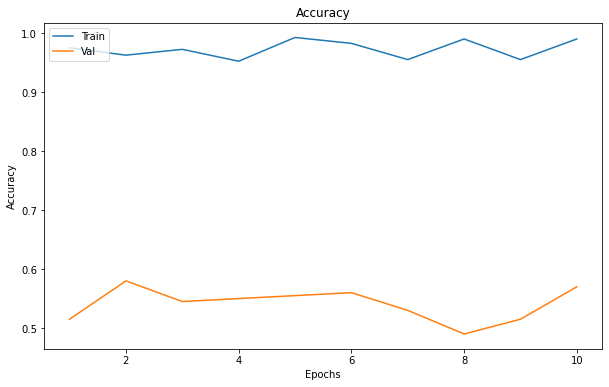

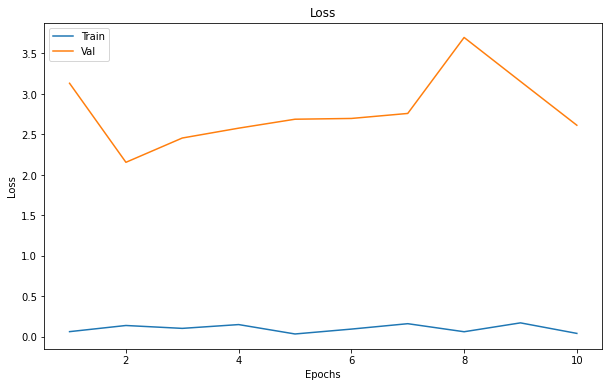

In [16]:
import matplotlib.pyplot as plt
plot_learning_curve(history,10)

# Early stopping

In [17]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='acc', min_delta=1e-3, patience=3, 
                        verbose=1, mode='auto',restore_best_weights=True)
model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics = ['acc'])

C:\Users\User\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [18]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              epochs=10,
                              verbose=2, callbacks=[monitor])

C:\Users\User\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
55/55 - 59s - loss: 0.2991 - acc: 0.9545 - val_loss: 3.1658 - val_acc: 0.5227
Epoch 2/10
55/55 - 66s - loss: 0.0089 - acc: 0.9973 - val_loss: 3.7617 - val_acc: 0.5568
Epoch 3/10
55/55 - 57s - loss: 0.2747 - acc: 0.9736 - val_loss: 4.8393 - val_acc: 0.4848
Epoch 4/10
55/55 - 55s - loss: 0.0226 - acc: 0.9945 - val_loss: 3.9137 - val_acc: 0.5568
Epoch 5/10
55/55 - 57s - loss: 0.1069 - acc: 0.9791 - val_loss: 3.8405 - val_acc: 0.5152
Restoring model weights from the end of the best epoch.
Epoch 00005: early stopping


In [19]:
y_prob = model.predict_generator(test_generator)

C:\Users\User\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [20]:
cls = []
classes = list(train_generator.class_indices.keys())

In [21]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])

In [22]:
cls

['n0', 'n2', 'n1', 'n3', 'n3', 'n7', 'n7', 'n7', 'n9']

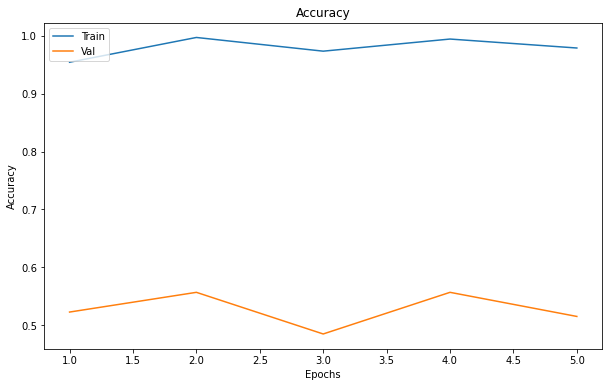

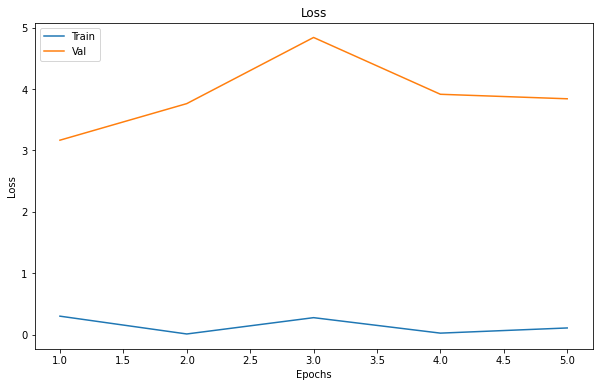

In [23]:
import matplotlib.pyplot as plt
plot_learning_curve(history,5)

# InceptionV3

In [24]:
from tensorflow.keras.applications import InceptionV3

In [25]:
from tensorflow.keras import models, layers, optimizers
model_base = InceptionV3(weights='imagenet',include_top=False)

x = model_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512,activation='relu')(x)
predictions = layers.Dense(int(len(train_generator.class_indices.keys())) ,activation='softmax')(x)
InceptionV3_model = models.Model(inputs= model_base.input, outputs=predictions)

In [27]:
InceptionV3_model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9) ,metrics=['acc'])
history = InceptionV3_model.fit_generator(train_generator, epochs=10, shuffle=True, verbose=1, validation_data=validation_generator)

Epoch 1/10
55/55 [==============================] - 128s 2s/step - loss: 0.7996 - acc: 0.8534 - val_loss: 0.9650 - val_acc: 0.7348
Epoch 2/10
55/55 [==============================] - 135s 2s/step - loss: 0.7153 - acc: 0.8761 - val_loss: 0.8967 - val_acc: 0.7538
Epoch 3/10
55/55 [==============================] - 145s 3s/step - loss: 0.6313 - acc: 0.8871 - val_loss: 0.8488 - val_acc: 0.7955
Epoch 4/10
55/55 [==============================] - 152s 3s/step - loss: 0.5859 - acc: 0.8871 - val_loss: 0.7969 - val_acc: 0.8068
Epoch 5/10
55/55 [==============================] - 142s 3s/step - loss: 0.5460 - acc: 0.9071 - val_loss: 0.7562 - val_acc: 0.8144
Epoch 6/10
55/55 [==============================] - 143s 3s/step - loss: 0.4672 - acc: 0.9162 - val_loss: 0.7151 - val_acc: 0.8295
Epoch 7/10
55/55 [==============================] - 125s 2s/step - loss: 0.4425 - acc: 0.9217 - val_loss: 0.6796 - val_acc: 0.8258
Epoch 8/10
55/55 [==============================] - 128s 2s/step - loss: 0.3814 - a

In [28]:
y_prob =InceptionV3_model.predict(test_generator,callbacks=[monitor])

In [29]:
cls = []
classes = list(train_generator.class_indices.keys())

In [30]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])
   

In [31]:
cls

['n0', 'n2', 'n3', 'n3', 'n3', 'n7', 'n7', 'n7', 'n0']

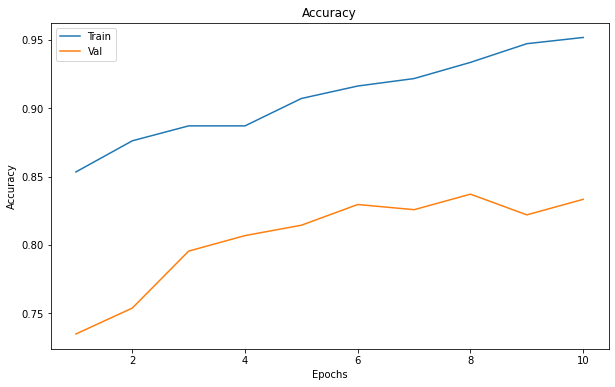

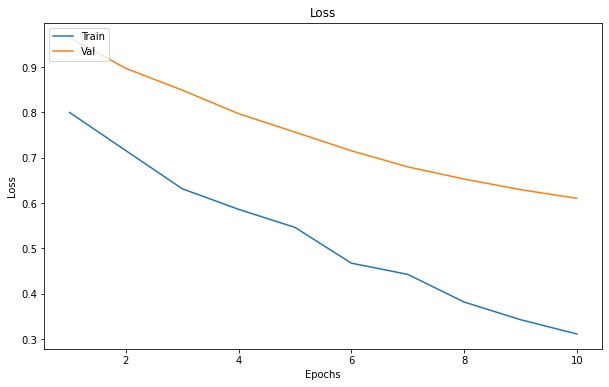

In [32]:
plot_learning_curve(history,10)

# ResNet50-SGD

In [33]:
from tensorflow.keras.applications import ResNet50

In [34]:
model_base = ResNet50(weights='imagenet',include_top=False)

x = model_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512,activation='relu')(x)
predictions = layers.Dense(int(len(train_generator.class_indices.keys())) ,activation='softmax')(x)
Resnet50_model = models.Model(inputs= model_base.input, outputs=predictions)

In [35]:
Resnet50_model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9) ,metrics=['acc'])
history = Resnet50_model.fit_generator(train_generator, epochs=10, shuffle=True, verbose=1, validation_data=validation_generator)

C:\Users\User\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\User\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
55/55 [==============================] - 202s 4s/step - loss: 2.4105 - acc: 0.1512 - val_loss: 2.3785 - val_acc: 0.0985
Epoch 2/10
55/55 [==============================] - 188s 3s/step - loss: 1.7218 - acc: 0.4617 - val_loss: 2.7323 - val_acc: 0.0985
Epoch 3/10
55/55 [==============================] - 206s 4s/step - loss: 1.2517 - acc: 0.7231 - val_loss: 4.0072 - val_acc: 0.0985
Epoch 4/10
55/55 [==============================] - 268s 5s/step - loss: 0.9231 - acc: 0.8470 - val_loss: 4.3741 - val_acc: 0.0985
Epoch 5/10
55/55 [==============================] - 228s 4s/step - loss: 0.6894 - acc: 0.9153 - val_loss: 4.4281 - val_acc: 0.0985
Epoch 6/10
55/55 [==============================] - 225s 4s/step - loss: 0.5338 - acc: 0.9362 - val_loss: 4.1132 - val_acc: 0.0985
Epoch 7/10
55/55 [==============================] - 229s 4s/step - loss: 0.4158 - acc: 0.9599 - val_loss: 3.7784 - val_acc: 0.0985
Epoch 8/10
55/55 [==============================] - 229s 4s/step - loss: 0.3554 - a

In [36]:
y_prob =Resnet50_model.predict(test_generator,callbacks=[monitor])

In [37]:
cls = []
classes = list(train_generator.class_indices.keys())

In [38]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])

In [39]:
cls

['n4', 'n4', 'n4', 'n4', 'n3', 'n8', 'n6', 'n4', 'n4']

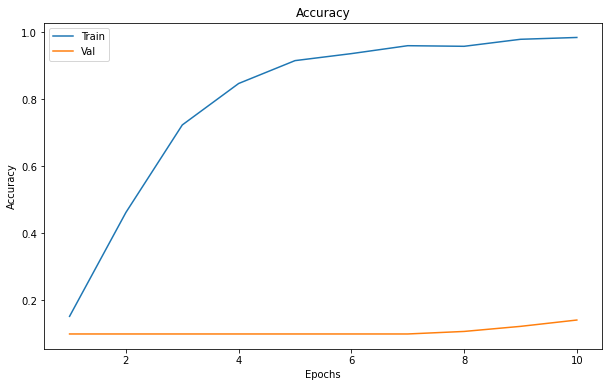

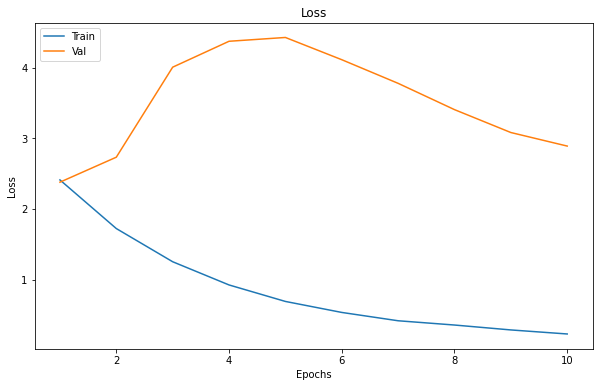

In [40]:
plot_learning_curve(history,10)

# ResNet50-RMSprop

In [41]:
Resnet50_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001) ,metrics=['acc'])
history = Resnet50_model.fit_generator(train_generator, epochs=10, shuffle=True, verbose=1, validation_data=validation_generator)

C:\Users\User\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
55/55 [==============================] - 246s 4s/step - loss: 2.5374 - acc: 0.3643 - val_loss: 15.1448 - val_acc: 0.1061
Epoch 2/10
55/55 [==============================] - 221s 4s/step - loss: 1.5204 - acc: 0.4954 - val_loss: 676.1793 - val_acc: 0.0985
Epoch 3/10
55/55 [==============================] - 244s 4s/step - loss: 1.1039 - acc: 0.6603 - val_loss: 550.2756 - val_acc: 0.0909
Epoch 4/10
55/55 [==============================] - 226s 4s/step - loss: 0.7218 - acc: 0.7559 - val_loss: 2.9475 - val_acc: 0.1667
Epoch 5/10
55/55 [==============================] - 241s 4s/step - loss: 0.5880 - acc: 0.8197 - val_loss: 28.8816 - val_acc: 0.1023
Epoch 6/10
55/55 [==============================] - 237s 4s/step - loss: 0.4858 - acc: 0.8397 - val_loss: 11.2829 - val_acc: 0.2765
Epoch 7/10
55/55 [==============================] - 272s 5s/step - loss: 0.3635 - acc: 0.8871 - val_loss: 3.5214 - val_acc: 0.4091
Epoch 8/10
55/55 [==============================] - 266s 5s/step - loss: 0.3

In [60]:
y_prob =Resnet50_model.predict(test_generator,callbacks=[monitor])

In [61]:
cls = []
classes = list(train_generator.class_indices.keys())

In [62]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])

In [63]:
cls

['n0', 'n5', 'n3', 'n1', 'n3', 'n0', 'n7', 'n7', 'n5']

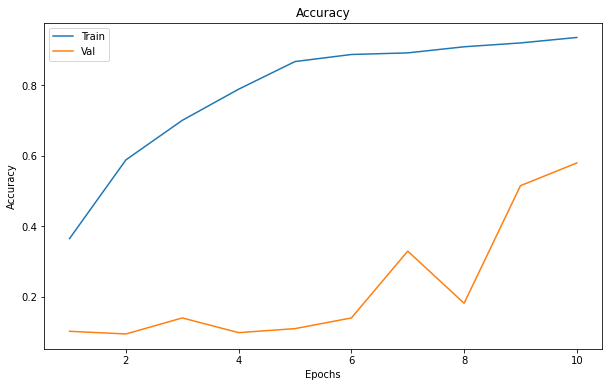

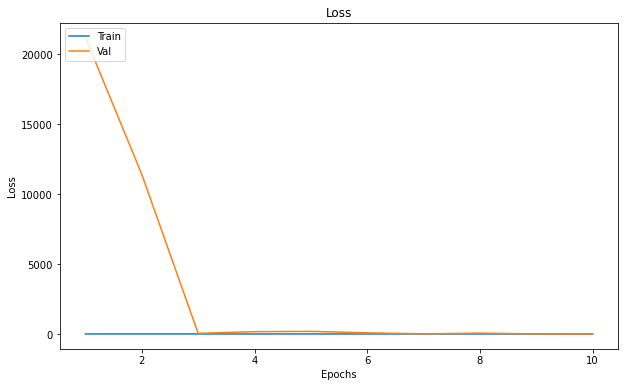

In [64]:
plot_learning_curve(history,10)